In [5]:
import numpy as np
from matplotlib import pyplot as plt
from observationModel import *
from particleFilter import *

## Task 1: Particle Filter Implementation

My particel filter is implemented as the class `ParticleFilter` located in `particleFilter.py`. The general steps that this filter takes every time step is ass follows:
1. propogate particles through the method `propogateXs()`.
    This method propogates all praticles forwards in time, while adding proccess noise drawn from Q. This results in the update: $ x_{t+1} = x_t + (\dot{x}_{t} + noise) * dT$, where noise is drawn from a zero-mean gaussion distribution from Q.

2. Compute weights for each particle with the method `computeWeights()`.
    This method computes a weight $w_i$ for each particle $x_i$ dependent on $p(z|x_i)$. After calculating weights for all particles, they can be normalized by the sum of all weights.

3. Resample particles with `lowVarianceSampling()`.
    This method uses the low variance sampling algorithm to resample particles according to their current distribution (defined by w's)

System Parameters:
R and Q matricies: The measurement covariance matrix R is reused from the Nonlinear Kalman Filter assignment. The process noise matrix Q was tuned for this filters performance.

        self.Q = np.diag([0.01] * 3 + [0.002] * 3 + [.1] * 3 + [.001] * 6) * 500
        self.R = np.diag([0.00558, 0.00558, 0.00558, 0.00412, 0.00412, 0.00412])
    

An example of the particle filter is shown below on dataset 2, with 500 particles. The results are plotted for the weighted average, average, and highest particle methods of extracting a state from the distribution.

-1
373


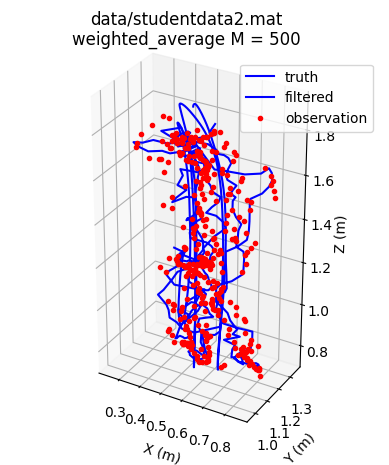

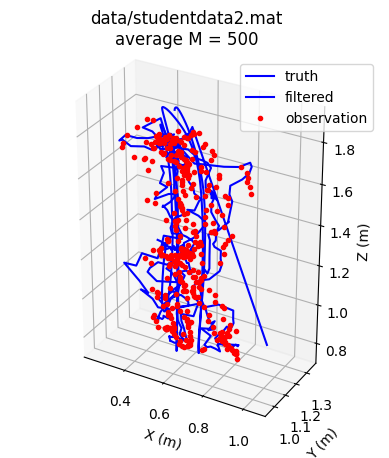

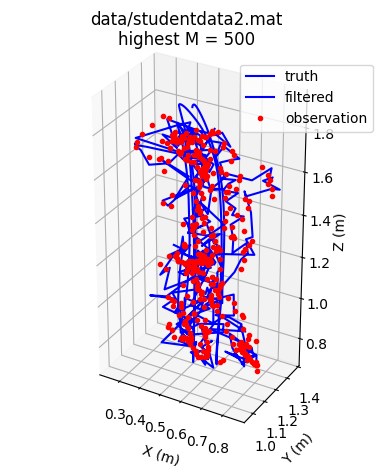

In [6]:
PF_data2 = ParticleFilter('data/studentdata2.mat', M = 500, debug=False)
PF_data2.plotResults3D(sampling='weighted_average')
PF_data2.plotResults3D(sampling='average')
PF_data2.plotResults3D(sampling='highest')

## Task 2: Navigation solution and particle count investigation

As shown above, my implementation allows for using the weighted avergae, average, or highest particle samplinng methods.

A big factor in the particle filters performance is the particle count. More particles will typicaly result in a more accurate state estimation, while also increasing the computational load. Here we will investigate the performance acrosss particle counts of [250, 500, 750, 1000, 2000, 3000, 4000, 5000]. We will compare the RMSE valaues for both position and rotation across all particle sets anad datasets.

The RMSE computation is done with the method `computeRMSE()`. Below it is shown for dataset2, along with a plot comparing the errors between different sampling methods.

RMSE for data/studentdata2.mat with 500 particles
	Weighted Average:
		Position: 0.11 m 	Rotation: 0.087 rad
	Average:
		Position: 0.126 m 	Rotation: 0.103 rad
	Highest:
		Position: 0.125 m 	Rotation: 0.084 rad


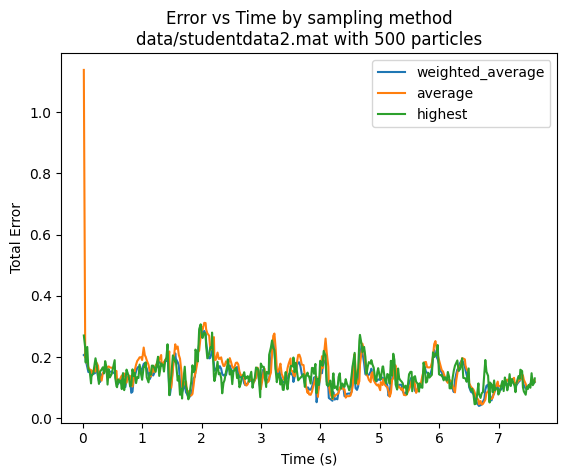

In [7]:
PF_data2.computeRMSE()
PF_data2.plotError()

After running the particle filter and computing the RMSE values across the datasets and particle count values, we obtain the following table:

![Image Title](results/results.png)

There are a couple important observations to be made from the table. First of all, and as expected, as the particle count increased so did the accuracey. However, this increased accuracey tends to become negligible when we reach ~2000 particles. Additionally, there was a very noticible increase in runtime as the particel count increased. Therfore it would not be addvised to increase the particle count past 2000 with this implementation. The three sampling methods had slight differences, with the weighted average method coming out on top. There was negligible difference between the average and highest methods.

## Task 3: Comparison to the nonlinear Kalman filter
Finally, please discuss in 2-3 paragraphs the results from this assignment as well as the previous Nonlinear Kalman Filter assignment. Some specific points to discuss:
• Ease of implementation
    Which method was easier to write the code for? Why? o Which method was easier to tune parameters for?
• Speed of code
    Which method runs faster?
    Why might this be important?
• Accuracy of results: which method yielded more accurate tracking results?